Size information:
	 Number of Training Samples: 5003520
	 Number of Validation Samples: 1250904
(208480, 7)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.020s...


C:\Users\stero\anaconda3\envs\richter-predictor\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\stero\anaconda3\envs\richter-predictor\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 1.054s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.426557
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.723038
[t-SNE] KL divergence after 1000 iterations: 1.467363


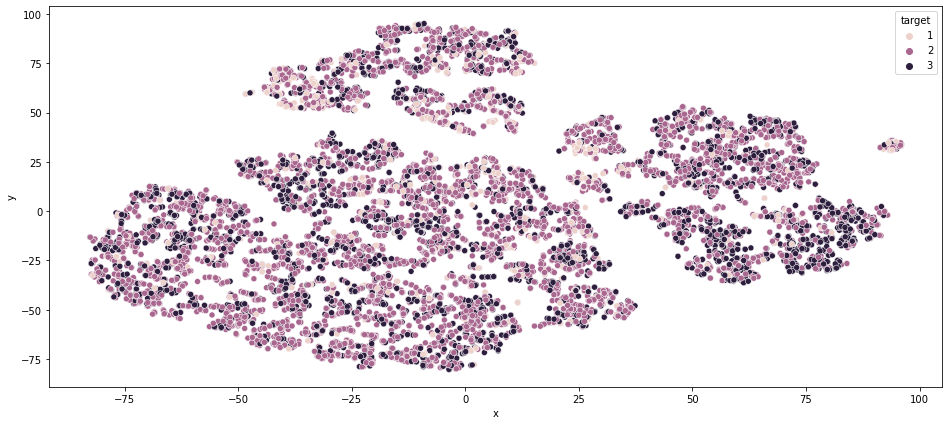

In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dataset

int_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
               'count_floors_pre_eq', 'age', 'area_percentage', 
               'height_percentage']
categ_columns = ['land_surface_condition', 'foundation_type', 'roof_type',
                 'ground_floor_type', 'other_floor_type', 'position',
                 'plan_configuration',
                 ]
binary_columns = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
                  'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
                  'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
                  'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_engineered',
                  'has_superstructure_other'
                  ]

n_datapoints = 10000

# Get Dataset
X_train, y_train, X_val, y_val = dataset.get_data()
print(X_train.shape)
target = y_train[:n_datapoints]
data = pd.DataFrame(X_train[:n_datapoints])

# data.drop(binary_columns)

tSNE=TSNE(n_components=2, verbose=1)
tSNE_result=tSNE.fit_transform(data)

x=tSNE_result[:,0]
y=tSNE_result[:,1]
df = pd.DataFrame(data)
df['target']=target
df['x']=x
df['y']=y

plt.figure(figsize=(16,7))
sns.scatterplot(x='x',y='y',hue='target',data=df,
               legend="full")
plt.show()